# Assignment 5

In [356]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Himeh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Himeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Himeh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Himeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# QUESTION ONE

## Part a

In [357]:
#Read in from pandas
hotelDf = pandas.read_csv('reviews.csv')
hotelDf.columns=['idNum','filePath','hotelName','reviewColumn','ratingScore','groundTruth']
hotelDf.head()


,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,117803689,data\ca\154948\1146548\118268031.html,Evolution,This is the second time this summer we stayed ...,4,positive
1,118268031,data\ca\154948\1146548\119564117.html,Evolution,"I really like this hotel, the decor is very mo...",5,positive
2,119564117,data\ca\154948\1146548\121167484.html,Evolution,We went to Whistler for the first time at the ...,5,positive
3,125313857,data\ca\154948\1146548\125351897.html,Evolution,Just returned from 8 days at Evolution. The pr...,5,positive
4,125011399,data\ca\154948\1146548\125351897.html,Evolution,"We visited Whistler with our three children, a...",5,positive


In [358]:
hotelDf['reviewColumn'].isnull().sum()
hotelDf['reviewColumn'].isnull().sum()
hotelDf.dropna(subset=['reviewColumn'], inplace=True)

In [359]:
hotelDf['groundTruth'].isnull().sum()
hotelDf = hotelDf.reset_index()

In [360]:
sentences=hotelDf.loc[0:10, "reviewColumn"]
sentences

0     This is the second time this summer we stayed ...
1     I really like this hotel, the decor is very mo...
2     We went to Whistler for the first time at the ...
3     Just returned from 8 days at Evolution. The pr...
4     We visited Whistler with our three children, a...
5     Evolution is located in Creekside which is a 5...
6     We just return from Whistler with the family a...
7     This hotel exceeded my expectations by far. We...
8     We stayed at the Evolution in Aug/12 Whistler ...
9     I've stayed at Evolution in the winter before ...
10    So Evolution is located in Whistlers Creek, th...
Name: reviewColumn, dtype: object

In [361]:
sentence_matrix=sentences.as_matrix()
hotelDf2=hotelDf.loc[:,"reviewColumn"]
hotel_matrix=hotelDf2.as_matrix()
#hotel_matrix

In [362]:
# sid = SentimentIntensityAnalyzer()
# pdlist = []

# for sentence in tqdm(sentence_matrix):
#     ss = sid.polarity_scores(sentence)
#     print(ss)
#     pdlist.append([sentence]+[ss['compound']])
#     reviewDf = pandas.DataFrame(pdlist)
#     reviewDf.columns = ['reviewCol','vader']
# print(reviewDf)

In [363]:
# sid = SentimentIntensityAnalyzer()
# pdlist = []
# for sentence in tqdm(sentence_matrix):

#     ss = sid.polarity_scores(sentence)
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#         #print (ss)
#     print()

In [364]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [365]:
reviewDF=evalSentences(hotel_matrix, to_df=True, columns=['reviewCol','vader'] )


100%|██████████| 3155/3155 [00:05<00:00, 642.00it/s]


In [366]:
reviewDF.head()

,reviewCol,vader
0,This is the second time this summer we stayed ...,0.8263
1,"I really like this hotel, the decor is very mo...",0.9883
2,We went to Whistler for the first time at the ...,0.8550
3,Just returned from 8 days at Evolution. The pr...,0.9928
4,"We visited Whistler with our three children, a...",0.8459


In [367]:
reviewDF.reset_index(inplace=True)

In [368]:
#reviewDF.head(n=3156)

In [369]:
reviewDF.shape

(3155, 3)

In [370]:
if 'vader' not in hotelDf.columns:
    hotelDf=hotelDf.join(reviewDF["vader"])
else:
    print( "vader already exists")
hotelDf.head()

,index,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,0,117803689,data\ca\154948\1146548\118268031.html,Evolution,This is the second time this summer we stayed ...,4,positive,0.8263
1,1,118268031,data\ca\154948\1146548\119564117.html,Evolution,"I really like this hotel, the decor is very mo...",5,positive,0.9883
2,2,119564117,data\ca\154948\1146548\121167484.html,Evolution,We went to Whistler for the first time at the ...,5,positive,0.8550
3,3,125313857,data\ca\154948\1146548\125351897.html,Evolution,Just returned from 8 days at Evolution. The pr...,5,positive,0.9928
4,4,125011399,data\ca\154948\1146548\125351897.html,Evolution,"We visited Whistler with our three children, a...",5,positive,0.8459


In [371]:
#max_val= reviewDF.loc[reviewDF['vader'].idxmax()]
hotelDf.dropna(subset=['vader'], inplace=True)

In [372]:
ground_truth= hotelDf["groundTruth"].unique()
print(ground_truth)       

['positive' 'negative']


In [373]:
pos_neg_hotelDf=hotelDf.copy()
positive_index = hotelDf[hotelDf.loc[:, "groundTruth"] == "positive"].index
hotelDf.loc[positive_index, "groundTruth"] = 1
hotelDf.head()

negative_index = hotelDf[hotelDf.loc[:, "groundTruth"] == "negative"].index
hotelDf.loc[negative_index, "groundTruth"] = -1
hotelDf.head()

#a=finaldf.groupby('hotelName').groundTruth.sum()
average_ground_thruth=hotelDf["groundTruth"].mean()
average_ground_thruth
#pos_neg_hotelDf

0.78890649762282095

In [374]:
# groundTruth_top_five= np.argsort(finaldf["groundTruth"])[-5:]
# groundTruth_bottom_five=np.argsort(finaldf["groundTruth"])[1:6]

# print ( "top five ground thruth is: " ,
#        finaldf.loc[groundTruth_top_five, "groundTruth"])
# print( "bottom five ground thruth is: " , 
#       finaldf.loc[groundTruth_bottom_five, "groundTruth"])

In [375]:
hotelDf.sort_values('groundTruth',ascending=0).head(5)

,index,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,0,117803689,data\ca\154948\1146548\118268031.html,Evolution,This is the second time this summer we stayed ...,4,1,0.8263
2123,2245,97884595,data\ca\154948\248173\97903540.html,Tantalus Lodge,The hotel was everything we expected. It was m...,4,1,-0.1307
2110,2232,190117321,data\ca\154948\248173\191176819.html,Tantalus Lodge,Basic 2 bed apartments in need of minor renova...,4,1,0.9649
2111,2233,191176819,data\ca\154948\248173\192290467.html,Tantalus Lodge,We stayed in one of the basic rooms for one ni...,4,1,0.8777
2114,2236,219366733,data\ca\154948\248173\219465771.html,Tantalus Lodge,Tantalus was one of the first lodges I stayed ...,4,1,0.9089


In [376]:
hotelDf.sort_values('groundTruth',ascending=1).head(5)

,index,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
1673,1776,267474301,data\ca\154948\184888\267738390.html,Hilton Whistler Resort & Spa,i chose the hilton again as i find the rooms t...,3,-1,0.9413
420,451,331957750,data\ca\154948\155554\332082267.html,Fairmont Chateau Whistler Resort,"Terribly slow and uninformed check in service,...",1,-1,-0.9184
418,449,319445037,data\ca\154948\155554\319452296.html,Fairmont Chateau Whistler Resort,My friend and I stayed at Fairmont Chateau Fri...,3,-1,-0.9104
2003,2120,311916692,data\ca\154948\224712\313361020.html,Blackcomb Lodge,"Being an introvert married to an introvert, Wh...",3,-1,0.9953
2002,2119,310369712,data\ca\154948\224712\311916692.html,Blackcomb Lodge,We stayed here sept 14-15. They have a two nig...,1,-1,-0.5256


In [377]:
average_vader=reviewDF["vader"].mean()
average_vader

0.8483825356576836

## Part b

In [378]:
def getHotelRank(df, measure='ratingScore', ascending=0):
    #Rank the hotel by ground truth rating score
    hotelNames=df["hotelName"].unique()
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avgRatingScore']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDfGt

In [379]:
High_rank_hotel= getHotelRank(hotelDf, measure='ratingScore', ascending=0).head(n=10)
High_rank_hotel.head(n=10)

,hotelName,avgRatingScore
36,Powders Edge,5.000000
35,Sunpath at Stoney Creek,5.000000
37,Nita Lake Lodge,4.840871
30,Four Seasons Resort and Residences Whistler,4.800000
29,First Tracks Lodge,4.754717
4,Pan Pacific Whistler Mountainside,4.686567
0,Evolution,4.666667
32,Pan Pacific Whistler Village Centre,4.648936
11,Crystal Lodge Hotel,4.633333
27,Sundial Boutique Hotel,4.633333


In [380]:
Low_rank_hotel=getHotelRank(hotelDf, measure='ratingScore', ascending=1).head(n=10)
Low_rank_hotel

,hotelName,avgRatingScore
36,Powders Edge,5.000000
35,Sunpath at Stoney Creek,5.000000
37,Nita Lake Lodge,4.840871
30,Four Seasons Resort and Residences Whistler,4.800000
29,First Tracks Lodge,4.754717
4,Pan Pacific Whistler Mountainside,4.686567
0,Evolution,4.666667
32,Pan Pacific Whistler Village Centre,4.648936
11,Crystal Lodge Hotel,4.633333
27,Sundial Boutique Hotel,4.633333


In [381]:
low_vadar=getHotelRank(hotelDf, measure='vader')
low_vadar.head()

,hotelName,avgRatingScore
15,Adara Hotel,0.988600
36,Powders Edge,0.985100
35,Sunpath at Stoney Creek,0.950940
6,Delta Hotels by Marriott Whistler Village Suites,0.937752
37,Nita Lake Lodge,0.934444


In [382]:
hotelRatingDfVd = getHotelRank(hotelDf, measure='vader')
hotelRatingDfVd.head()

,hotelName,avgRatingScore
15,Adara Hotel,0.988600
36,Powders Edge,0.985100
35,Sunpath at Stoney Creek,0.950940
6,Delta Hotels by Marriott Whistler Village Suites,0.937752
37,Nita Lake Lodge,0.934444


Mostly the top five hotels for average vader and ground thruth is similar. However, interstingly Adara Hotel has the highest average vader(0.988600), while it has the lowest ground truth (2.00). Positive words are used in the review for this hotel (Reviewer expectation that did not met with this hotel), which is the reason for high vader score.

Adara hotel has only one review which is as follow: 

"The hotel was fine, nothing special. Rooms could be cleaner. Furniture attempts to be "funky" but really just looks outdated and uncomfortable. Hallways could really use new carpets but the lobby is nice. I was dying of thirst after skiing but I would still discourage anyone from drinking the complimentary (luke warm) water with "lemons" in the front entrance. It tasted awful and from the looks of it, probably hadn't been changed in a day or two.   Staff were okay but did not go above and beyond their regular duties. Often would not even greet me as I walked by or were completely absent from the front desk. Surprising to see when they make a point of telling you there's someone there 24 hours. Luckily, we didn't have any immediate requests but it would have been nice to have had some sense of security that people couldn't just roam in and out unnoticed (which they could very easily). Since the elevator can be accessed freely by anyone, I did not feel entirely safe, especially because of the drunk people roaming around at night (FYI the hotel is attached to a nightclub).  As many others have mentioned the nightclub, I'll skip that part but just say that if you're a family or someone who needs 5+ hours of sleep, this is probably not the best place to stay. Bed was uncomfortable and one of the pool towels we used had yellow stains all over it... yuck.   Breakfast bars and cookies are a nice touch... but would be even better if the staff didn't actually touch them with their bare hands after handling money, keyboards, credit cards, and phones all day long.   The only positive thing I can say is the location is good but there are plenty of other hotels in the area that will fetch a much better value. Good luck to anyone who decides to stay there... it seems from the varied reviews on here that you'll probably need it.
"

In [291]:
hotelDf[hotelDf["hotelName"]== "Adara Hotel"]["reviewColumn"]

1251    The hotel was fine, nothing special. Rooms cou...
Name: reviewColumn, dtype: object

# Question 2

In [292]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
# def dataFrameTransformation( hotelDf, reviewDF, k,ground_Truth):
   
#     """
#     grountruth could be either positive or negative
#     """
# #     a=hotelDf.loc[hotelDf['groundTruth'] == "positive"].index
# #     hotelDf.loc[a, "reviewColumn"]


#     if ground_Truth == "positive":
#         positive_reviews=hotelDf.loc[hotelDf['groundTruth'] == "positive"].index
#         reviews=hotelDf.loc[positive_reviews, "reviewColumn"].as_matrix()
#     else:
#         negative_reviews=hotelDf.loc[hotelDf['groundTruth'] == "negative"].index
#         reviews=hotelDf.loc[negative_reviews, "reviewColumn"].as_matrix()
        
        
#     stop = set(stopwords.words('english'))
    
#     # Top-k frequent terms
#     counter = Counter()
#     for review in reviews:
#             counter.update([word.lower() 
#                             for word 
#                             in re.findall(r'\w+', review) 
#                             if word.lower() not in stop and len(word) > 2])
#     topk = counter.most_common(k)        
    
#     #Find out if a particular review has the word from topk list
#     freqReview = []
#     for i in range(len(reviews)):
#         tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
#         topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
#         freqReview.append(topkinReview)
        
        
#     #Prepare freqReviewDf
#     freqReviewDf = pandas.DataFrame(freqReview)
#     dfName = []
#     for c in topk:
#         dfName.append(c[0])
#     freqReviewDf.columns = dfName
#     finalreviewDf = reviewDF.join(freqReviewDf)
#     finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
#     return topk, finaldf

In [293]:
#dataFrameTransformation(hotelDf, reviewDF, k=50, ground_Truth="positive")
# dataFrameTransformation(hotelDf, reviewDF, k=50, ground_Truth="negative")

In [294]:
#Read in from pandas
pos_neg_hotelDf = pandas.read_csv('reviews.csv')
pos_neg_hotelDf.columns=['idNum','filePath','hotelName','reviewColumn','ratingScore','groundTruth']
pos_neg_hotelDf.head()
pos_neg_hotelDf.dropna(subset=['reviewColumn'], inplace=True)

In [295]:
def dataFrameTransformation( hotelDf, reviewDF, k,ground_Truth):  
    """
    grountruth could be either positive or negative
    """
#     a=hotelDf.loc[hotelDf['groundTruth'] == "positive"].index
#     hotelDf.loc[a, "reviewColumn"]
    if ground_Truth == "positive":
        positive_reviews=hotelDf.loc[hotelDf['groundTruth'] == "positive"].index
        reviews=hotelDf.loc[positive_reviews, "reviewColumn"].as_matrix()
    elif ground_Truth == "negative":
        negative_reviews=hotelDf.loc[hotelDf['groundTruth'] == "negative"].index
        reviews=hotelDf.loc[negative_reviews, "reviewColumn"].as_matrix()
    else:
        reviews = hotelDf['reviewColumn'].as_matrix()
        
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')
    lemmatizer = nltk.WordNetLemmatizer()
    stemmer = nltk.stem.porter.PorterStemmer()
        # Top-k frequent terms
    counter = Counter()
    for review in reviews:
        for word in review:
            #word.lower()
            stemmer.stem(word)
            lemmatizer.lemmatize(word)
            
        counter.update([word.lower() for word  in re.findall(r'\w+', review) 
                        if word.lower() not in stopwords and len(word) > 2])
    topk = counter.most_common(k)         
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf    

In [296]:
top_fifty_word_positive, dataframe_fifty_words= dataFrameTransformation( pos_neg_hotelDf, reviewDF, 50,"positive")

In [297]:
#dataframe_fifty_words
top_fifty_word_positive

[('hotel', 3184),
 ('room', 2961),
 ('whistler', 2348),
 ('great', 2251),
 ('staff', 1768),
 ('stay', 1687),
 ('village', 1645),
 ('would', 1246),
 ('nice', 1188),
 ('location', 1135),
 ('ski', 1116),
 ('good', 1108),
 ('rooms', 1092),
 ('stayed', 1075),
 ('one', 1024),
 ('service', 1021),
 ('well', 924),
 ('friendly', 913),
 ('lake', 869),
 ('also', 813),
 ('day', 809),
 ('hot', 791),
 ('pool', 788),
 ('clean', 759),
 ('time', 740),
 ('lodge', 737),
 ('helpful', 728),
 ('walk', 703),
 ('place', 679),
 ('area', 672),
 ('back', 669),
 ('comfortable', 666),
 ('night', 662),
 ('really', 652),
 ('free', 612),
 ('bed', 606),
 ('get', 601),
 ('tub', 588),
 ('breakfast', 579),
 ('view', 567),
 ('suite', 565),
 ('two', 563),
 ('could', 562),
 ('excellent', 548),
 ('parking', 543),
 ('right', 536),
 ('food', 495),
 ('kitchen', 492),
 ('like', 491),
 ('mountain', 485)]

In [298]:
top_fifty_word_negative=dataFrameTransformation( pos_neg_hotelDf, reviewDF, 50,"negative")
top_fifty_word_negative

([('room', 576),
  ('hotel', 479),
  ('would', 209),
  ('whistler', 205),
  ('one', 199),
  ('stay', 199),
  ('rooms', 183),
  ('good', 175),
  ('staff', 175),
  ('location', 170),
  ('night', 168),
  ('village', 158),
  ('great', 150),
  ('get', 148),
  ('nice', 145),
  ('pool', 135),
  ('service', 134),
  ('bed', 130),
  ('hot', 129),
  ('time', 126),
  ('like', 119),
  ('front', 116),
  ('day', 115),
  ('small', 113),
  ('stayed', 112),
  ('could', 107),
  ('clean', 107),
  ('desk', 107),
  ('parking', 106),
  ('also', 99),
  ('ski', 97),
  ('well', 97),
  ('two', 96),
  ('breakfast', 95),
  ('back', 91),
  ('tub', 84),
  ('check', 83),
  ('really', 80),
  ('walk', 77),
  ('free', 75),
  ('friendly', 75),
  ('bathroom', 74),
  ('better', 73),
  ('even', 73),
  ('door', 73),
  ('next', 71),
  ('people', 69),
  ('got', 69),
  ('place', 66),
  ('hilton', 66)],
             hotelName  ratingScore groundTruth  index  \
 0           Evolution            4    positive    0.0   
 1         

In [121]:
from nltk.corpus import stopwords

In [122]:
def getTopK(df, k, label_value, label_column, operation=operator.eq, value_column='reviewCol'):
    stop = set(stopwords.words('english'))
    if label_column == "positive":
        positive_reviews=hotelDf.loc[hotelDf['groundTruth'] == "positive"].index
        reviews=hotelDf.loc[positive_reviews, "reviewColumn"].as_matrix()
    elif label_column == "negative":
        negative_reviews=hotelDf.loc[hotelDf['groundTruth'] == "negative"].index
        reviews=hotelDf.loc[negative_reviews, "reviewColumn"].as_matrix()
    else:
        reviews = hotelDf['reviewColumn'].as_matrix()
        
#    from nltk.corpus import stopwords

 #   stop = stopwords.words('english')
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('whistler')
    stop.add('also')
#     stop.add('whistler')
#     stop.add('whistler')
#     stop.add('whistler')
#     stop.add('whistler')
#     stop.add('whistler')   
    
    
    counter = Counter()
    for review in reviews:
        for word in review:
            #word.lower()
            stemmer.stem(word)
            lemmatizer.lemmatize(word)
            
        counter.update([word.lower() for word  in re.findall(r'\w+', review) 
                        if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)         
    return topk

In [300]:
#getTopK(pos_neg_hotelDf, 50, "positive", label_column='groundTruth', operation=operator.eq, value_column='reviewCol')

Some words such as hotel, room, good, great exist in both negative and positive reviews. However, a word like "good" has a higher word count in positive reviews (1100) than negative reviews(100).
People use "good" in negative reviews to talk about their expectation from the hotel, or use sarcasm, or say something was not good.

# part b


In [301]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

tagger = PerceptronTagger()
for text in reviewDF["reviewCol"]:

# Part of Speech Tagging
# Google: https://en.wikipedia.org/wiki/Part-of-speech_tagging
    pos_tag = tagger.tag
    taggedToks = pos_tag(re.findall(r'\w+', text))


# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# Create phrase tree
chunker = nltk.RegexpParser(grammar)
tree= chunker.parse(taggedToks)


def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

            
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList
#flatten(npTokenList)

In [302]:
#npTokenList = [word for word in get_terms(tree)]
#npTokenList

In [303]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k, label_column):
    
    if label_column == "positive":
        positive_reviews=hotelDf.loc[hotelDf['groundTruth'] == "positive"].index
        reviews=hotelDf.loc[positive_reviews, "reviewColumn"].as_matrix()
    elif label_column == "negative":
        negative_reviews=hotelDf.loc[hotelDf['groundTruth'] == "negative"].index
        reviews=hotelDf.loc[negative_reviews, "reviewColumn"].as_matrix()
    else:
        reviews = hotelDf['reviewColumn'].as_matrix()
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [304]:
topk_phrase_positive, finaldf_phrase = newDataFrameTransformation(pos_neg_hotelDf, reviewDF, 50, "positive")

In [305]:
topk_phrase_positive

[('hot tub', 345),
 ('whistler villag', 275),
 ('nita lake lodg', 209),
 ('front desk', 167),
 ('minut walk', 128),
 ('bedroom suit', 118),
 ('great locat', 96),
 ('short walk', 87),
 ('great place', 78),
 ('nita lake', 75),
 ('first time', 69),
 ('main villag', 67),
 ('full kitchen', 63),
 ('hotel staff', 60),
 ('pool area', 57),
 ('great stay', 56),
 ('front desk staff', 51),
 ('nice touch', 49),
 ('ski valet', 47),
 ('great time', 47),
 ('ski lift', 46),
 ('pan pacif', 46),
 ('great hotel', 46),
 ('great view', 45),
 ('upper villag', 42),
 ('friendli staff', 42),
 ('free shuttl', 39),
 ('next time', 39),
 ('min walk', 39),
 ('creeksid gondola', 38),
 ('whistler mountain', 38),
 ('good valu', 38),
 ('easi access', 37),
 ('room servic', 37),
 ('comfort bed', 36),
 ('outdoor hot tub', 36),
 ('summit lodg', 36),
 ('blackcomb mountain', 35),
 ('night stay', 35),
 ('shuttl servic', 35),
 ('four season', 34),
 ('free wifi', 34),
 ('long day', 34),
 ('hotel room', 34),
 ('mountain view', 33

In [306]:
topk_phrase_negative, finaldf_phrase = newDataFrameTransformation(pos_neg_hotelDf, reviewDF, 50, "negative")
topk_phrase_negative

[('hot tub', 56),
 ('front desk', 44),
 ('great locat', 20),
 ('whistler villag', 16),
 ('front desk staff', 14),
 ('star hotel', 13),
 ('hotel room', 12),
 ('pool area', 11),
 ('custom servic', 10),
 ('short walk', 9),
 ('bedroom suit', 9),
 ('good valu', 8),
 ('pan pacif', 8),
 ('live room', 8),
 ('sofa bed', 8),
 ('night stay', 7),
 ('upper villag', 7),
 ('junior suit', 7),
 ('ski boot', 7),
 ('first night', 7),
 ('next morn', 6),
 ('minut walk', 6),
 ('four season', 6),
 ('first time', 6),
 ('basic room', 6),
 ('room key', 6),
 ('good locat', 6),
 ('good deal', 6),
 ('free wifi', 6),
 ('min walk', 6),
 ('next door', 6),
 ('staff member', 5),
 ('hotel guest', 5),
 ('main villag', 5),
 ('queen bed', 5),
 ('excel locat', 5),
 ('sever time', 5),
 ('coast blackcomb suit', 5),
 ('king bed', 5),
 ('clean staff', 5),
 ('shuttl servic', 5),
 ('groceri store', 5),
 ('master bedroom', 5),
 ('free park', 4),
 ('great hotel', 4),
 ('gener manag', 4),
 ('late check', 4),
 ('common area', 4),
 ('

In the top 50 negative noune phrases, phrases are mostly specific to the room: room key, sofa bed, bedroom suit, king bed, master bedroom.... which the reviewers may mention those things for a reason

while in the top k positive phrases, words were generally about the neihbourhood or activities they had in the hotel or nearby.

They are still similar words in both groups, which can be reduced in MI or pairwise MI.

In [43]:
# a=hotelDf.loc[hotelDf['groundTruth'] == "positive"].index
# hotelDf.loc[a, "reviewColumn"]

In [44]:
# topkGroundPos = getTopK(df=itemAnalysisDf, k=10, label_value='positive')
# topkGroundNeg = getTopK(df=itemAnalysisDf, k=10, label_value='negative')

In [45]:
# # Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
# def dataFrameTransformation_nnp( hotelDf, reviewDF, k,ground_Truth):
   
#     """
#     grountruth could be either positive or negative
#     """
# # for i in taggedToks:
# #     if i[1]=="NNP":
# #         print (i)

        
#     tagger = PerceptronTagger()
       
#     if ground_Truth == "positive":
#         positive_reviews=hotelDf.loc[hotelDf['groundTruth'] == "positive"].index
#         reviews=hotelDf.loc[positive_reviews, "reviewColumn"].as_matrix()
        
#         for text in reviews:
#             pos_tag = tagger.tag
#             taggedToks = pos_tag(re.findall(r'\w+', text))
   
#         reviews = [word for word,pos in taggedToks if pos == 'NNP']
        
        
        
#     else:
#         negative_reviews=hotelDf.loc[hotelDf['groundTruth'] == "negative"].index
#         reviews=hotelDf.loc[negative_reviews, "reviewColumn"].as_matrix()
        
#         for text in reviews:
#             pos_tag = tagger.tag
#             taggedToks = pos_tag(re.findall(r'\w+', text))

#         reviews = [word for word,pos in taggedToks if pos == 'NNP']
        
#     stop = set(stopwords.words('english'))
    
#     # Top-k frequent terms
#     counter = Counter()
#     for review in reviews:
#             counter.update([word.lower() 
#                             for word 
#                             in re.findall(r'\w+', review) 
#                             if word.lower() not in stop and len(word) > 2])
#     topk = counter.most_common(k)        
    
#     #Find out if a particular review has the word from topk list
#     freqReview = []
#     for i in range(len(reviews)):
#         tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
#         topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
#         freqReview.append(topkinReview)
        
        
#     #Prepare freqReviewDf
#     freqReviewDf = pandas.DataFrame(freqReview)
#     dfName = []
#     for c in topk:
#         dfName.append(c[0])
#     freqReviewDf.columns = dfName
#     finalreviewDf = reviewDF.join(freqReviewDf)
#     finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
#     return topk, finaldf

In [46]:
# topkk, finaldff =dataFrameTransformation_nnp(hotelDf, reviewDF, k=50, ground_Truth="positive")

In [47]:
# finaldff.head(n=3000)
#finaldf_phrase.head()
#topk_phrase

# QUESTION 3

In [48]:
# get Top K mutual information terms from the dataframe
def getMI(topk, finaldf, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(finaldf[label_column], finaldf[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [153]:
topk_word_all, finaldf_word_all= dataFrameTransformation( pos_neg_hotelDf, reviewDF, 5000,"all")
topk_phrase_all, finaldf_phrase_all = newDataFrameTransformation(pos_neg_hotelDf, reviewDF, 5000, "all")

In [154]:
miScoredf_word = getMI(topk_word_all, finaldf_word_all)
miScoredf_word

,Word,MI Score
22,lake,0.012338
71,nita,0.010270
376,aava,0.009550
995,pinnacle,0.007307
54,shuttle,0.007281
43,view,0.007150
28,lodge,0.007020
24,clean,0.007005
4391,losing,0.006875
2196,tantalus,0.006712


Words like great, good, hotel, and room which exist in top 50 words in positive and negative reviews, do not have high MI.

View, beatifull, shuttle and clean have high MI (If a review consists of these words it considered as a positive review).

Thin, noise and blood also have high MI (If a review consists of these words it considered as a negative review). 

In [155]:
miScoredf_phrase = getMI(topk_phrase_all, finaldf_phrase_all)
miScoredf_phrase

,Word,MI Score
3,nita lake lodg,0.008046
9,nita lake,0.007092
2507,young adult,0.006173
2247,pool view,0.006173
2536,dusti bar,0.006173
1396,white spot restaur,0.006173
2446,loud parti,0.006173
993,blood stain,0.006173
990,free bu servic,0.006173
2480,arriv staff,0.006173


This is more specific, dusty bar, blood stain => negative MI

nice exercis room, safe enjoy, bad kitchenett, and nice shop has the lowest MI in the list.

# QUESTION 4

In [156]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log10((pxy+0.0001)/(px*py))
            else:
                pmi = math.log10(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [157]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log10((pxy+0.0001)/(px*py))
    else:
        pmi = math.log10(pxy/(px*py))
    return pmi

In [158]:
#pmiIndivCal(dataframe_fifty_words,"hotel","positive", label_column='groundTruth')

In [159]:
def pmiForAllCal(df, topk,label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe   
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [160]:
pmiposlist__word, pmineglist_word, pmidf_word=pmiForAllCal( finaldf_word_all, topk_word_all)


 91%|█████████ | 4557/5000 [10:32<00:58,  7.59it/s]C:\Users\Himeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Himeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
100%|██████████| 5000/5000 [11:29<00:00,  7.76it/s]


In [218]:
pmiposlist__word.sort_values("pmi",ascending=0)

,word,pmi
4557,snows,inf
1672,rare,0.048442
1559,massages,0.048442
1613,blankets,0.048442
1621,robe,0.048442
1603,stress,0.048442
1657,refrigerator,0.048442
1335,meeting,0.048442
1678,nestled,0.048442
1565,transport,0.048442


Words which have the highe pmi in this dataframe, are mostly used in the positive reviews

we can see that words with the lowest pmi in the positive list, has the highest pmi valu in the negative list.

However, words like confusion and stress are located in the top positive list. (the confusion was about the parking, which was free)

In [309]:
pmineglist_word.sort_values("pmi",ascending=0)

,word,pmi
4557,snows,inf
4655,unsecured,0.976555
4938,handicap,0.976555
4656,soothes,0.976555
4650,clarified,0.976555
4845,audience,0.976555
4649,decently,0.976555
4391,losing,0.976555
4648,incompetent,0.976555
4955,glare,0.976555


In [161]:
pmiposlist__phrase, pmineglist_phrase, pmidf_phrase= pmiForAllCal(finaldf_phrase_all,topk_phrase_all)

 60%|██████    | 3009/5000 [07:00<04:14,  7.83it/s]C:\Users\Himeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Himeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
100%|██████████| 5000/5000 [11:46<00:00,  7.19it/s]


In [220]:
pmiposlist__phrase.sort_values("pmi",ascending=0)

,word,pmi
3520,front desk receptionist,inf
4227,main town centr,inf
3011,great iga,inf
3010,countless bar,inf
3009,ticket booth rental,inf
3980,anyth close,inf
3979,great ski shop,inf
3978,boot close,inf
4226,excel cocktail,inf
3186,memor whistler experi,inf


In [311]:
pmineglist_phrase.sort_values("pmi",ascending=0)

,word,pmi
3063,hotel stuff,inf
3618,fish museum olymp villag,inf
4836,next weekend,inf
4835,grand son,inf
4834,daughter son,inf
4833,round excel stay,inf
4832,fab morn,inf
3620,long ride,inf
3619,servic superb,inf
3085,head home,inf


Inf values makes sense since the denominator is zero: Some words only use in positive reviews and when we want to calculate pmi of the word occuring with negative reviews, we see that the denominator become zero since the word does not exist in negative comments (p=0 )=> we will get inf value for them. 

# C

In [221]:
#Low_rank_hotel
#High_rank_hotel

In [215]:
NewDF=pos_neg_hotelDf.loc[pos_neg_hotelDf["hotelName"]=="Nita Lake Lodge"]

hotelDf2=NewDF.loc[:,"reviewColumn"]
hotel_matrix_Adara=hotelDf2.as_matrix()

review_Adara=evalSentences(hotel_matrix, to_df=True, columns=['reviewCol','vader'] )

100%|██████████| 3155/3155 [00:05<00:00, 543.27it/s]


,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth
2689,102045148,data\ca\154948\681334\102650603.html,Nita Lake Lodge,We stayed for 10 nights at Nita Lake Lodge and...,5,positive
2690,100557470,data\ca\154948\681334\102650603.html,Nita Lake Lodge,"What an amazing place, stayed here with my bro...",5,positive
2691,102650603,data\ca\154948\681334\103118728.html,Nita Lake Lodge,"We were in room 316,a corner room. I think it ...",5,positive
2692,103118728,data\ca\154948\681334\103228444.html,Nita Lake Lodge,I have been to Whistler 6 times now. I have st...,5,positive
2693,103228444,data\ca\154948\681334\105649486.html,Nita Lake Lodge,Nita Lake Lodge is a beautiful hotel in a beau...,5,positive


In [223]:
topk_word_all_nita, finaldf_word_all_nita= dataFrameTransformation( NewDF, review_Adara, 500,"all")
pmiposlist__word_nita, pmineglist_word_nita, pmidf_word_nita=pmiForAllCal( finaldf_word_all_nita, topk_word_all_nita)

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\Himeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Himeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
100%|██████████| 500/500 [00:11<00:00, 43.93it/s]


In [224]:
pmiposlist__word_nita.sort_values("pmi",ascending=0)

,word,pmi
0,lake,inf
329,pleasant,inf
342,try,inf
341,incredible,inf
340,truly,inf
339,work,inf
338,activities,inf
337,leave,inf
336,spot,inf
335,thought,inf


In [217]:
NewDFpeak=pos_neg_hotelDf.loc[pos_neg_hotelDf["hotelName"]=="Whistler Peak Lodge"]

hotelDf2=NewDFpeak.loc[:,"reviewColumn"]
hotel_matrix_Adara=hotelDf2.as_matrix()

review_peak=evalSentences(hotel_matrix, to_df=True, columns=['reviewCol','vader'] )

topk_word_all_peak, finaldf_word_all_peak= dataFrameTransformation( NewDFpeak, review_peak, 500,"all")
pmiposlist__word_peak, pmineglist_word_peak, pmidf_word_adara=pmiForAllCal( finaldf_word_all_peak, topk_word_all_peak)

  0%|          | 0/311 [00:00<?, ?it/s]C:\Users\Himeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Himeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
100%|██████████| 311/311 [00:04<00:00, 75.63it/s]


In [225]:
pmiposlist__word_peak.sort_values("pmi",ascending=0)

,word,pmi
0,bike,inf
205,free,inf
212,top,inf
211,cherry,inf
210,joke,inf
209,pot,inf
208,lying,inf
207,accused,inf
206,kidding,inf
204,apologized,inf


This is the low rank hotel => there is no positive comment here => denominator is zero => inf

In [328]:
NewDF=pos_neg_hotelDf.loc[pos_neg_hotelDf["hotelName"]=="Nita Lake Lodge"]
hotelDf2=NewDF.loc[:,"reviewColumn"]
hotel_matrix_Adar=hotelDf2.as_matrix()
len(hotel_matrix_Adar)
NewDFpeak=pos_neg_hotelDf.loc[pos_neg_hotelDf["hotelName"]=="Whistler Peak Lodge"]
hotelDf2=NewDFpeak.loc[:,"reviewColumn"]
hotel_matrix_Adara=hotelDf2.as_matrix()

new=pandas.concat((NewDF,NewDFpeak))
#new
#merge= hotel_matrix_Adara+ hotel_matrix_Adar
merge= np.concatenate((hotel_matrix_Adara, hotel_matrix_Adar), axis=0)
#len(merge)
#len(hotel_matrix_Adar)
review_merge=evalSentences(merge, to_df=True, columns=['reviewCol','vader'] )

topk_word_all_merge, finaldf_word_all_merge= dataFrameTransformation( new, review_merge, 500,"all")
pmiposlist__word_merge, pmineglist_word_merge, pmidf_word_merge=pmiForAllCal( finaldf_word_all_merge, topk_word_all_merge)

  0%|          | 0/500 [00:00<?, ?it/s]C:\Users\Himeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
  3%|▎         | 14/500 [00:00<00:12, 40.43it/s]C:\Users\Himeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
100%|██████████| 500/500 [00:11<00:00, 39.67it/s]


In [329]:
pmiposlist__word_merge.sort_values("pmi",ascending=0)

,word,pmi
499,upon,inf
270,thanks,inf
280,lots,inf
279,space,inf
428,saw,inf
277,honeymoon,inf
276,holiday,inf
275,across,inf
274,driver,inf
273,wine,inf


In [330]:
pmineglist_word_merge.sort_values("pmi",ascending=0)

,word,pmi
499,upon,inf
247,menu,inf
256,wanted,inf
255,open,inf
254,new,inf
253,side,inf
252,thank,inf
394,else,inf
395,canada,inf
249,sitting,inf


# QUESTION 5

# a

In [383]:

# HotelNames=hotelDf["hotelName"].unique()

# num_reviews_hotel_df=hotelDf.groupby("hotelName").reviewColumn.count()
# num_reviews_hotel_array=num_reviews_hotel_df.as_matrix()
# j=1
# dict={}

# for i in num_reviews_hotel_array:
#     j=j+1

# list1= list(range(1,j))
# list2= num_reviews_hotel_array
# list3=HotelNames
# percentile_list = pandas.DataFrame(
#     {'Hotel ID': list1,
#      'HotelNames': list3,
#      'Num of Reviews': list2
#     })
# percentile_list.head()

In [384]:
HotelNames=hotelDf["hotelName"].unique()

num_reviews_hotel_df=hotelDf.groupby("hotelName").reviewColumn.count()
num_reviews_hotel_array=num_reviews_hotel_df.as_matrix()

HotelNames=hotelDf["hotelName"].unique()

mean_vader_hotel_df=hotelDf.groupby("hotelName").vader.mean()
mean_vader_hotel_array=mean_vader_hotel_df.as_matrix()

#hotelDf["ratingScore"]=hotelDf.ratingScore.astype(float)
#hotelDf.head()
mean_groundTruth_hotel_df=hotelDf.groupby("hotelName").ratingScore.mean()
mean_groundTruth_hotel_array=mean_groundTruth_hotel_df.as_matrix()/5


j=1
dict={}

for i in num_reviews_hotel_array:
    j=j+1

list1= list(range(1,j))
list2= num_reviews_hotel_array
list3=sorted(HotelNames)
list4=mean_vader_hotel_array
list5=mean_groundTruth_hotel_array

percentile_list = pandas.DataFrame(
    {'Hotel ID': list1,
     'HotelNames': list3,
     'Num of Reviews': list2,
     "mean vader":list4,
     "mean ground truth": list5
     
    })
percentile_list.head()

,Hotel ID,HotelNames,Num of Reviews,mean ground truth,mean vader
0,1,Aava Whistler Hotel,174,0.833333,0.853725
1,2,Adara Hotel,1,0.400000,0.988600
2,3,Aspens on Blackcomb,37,0.713514,0.691005
3,4,Blackcomb Lodge,44,0.727273,0.590752
4,5,Carleton Lodge,18,0.877778,0.857072


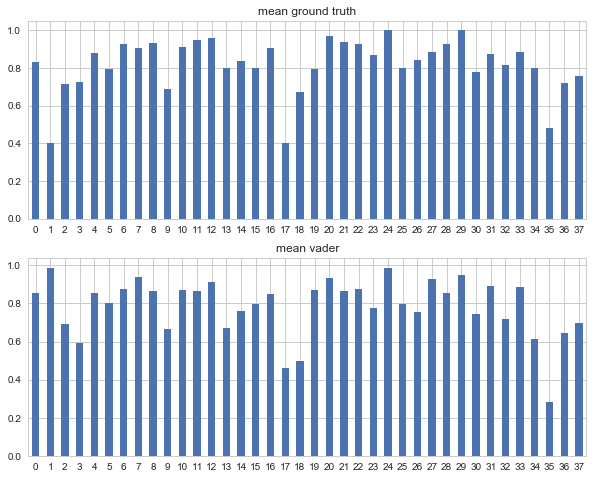

In [385]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
percentile_list['mean ground truth'].plot(kind='bar', rot=0, ax=axes[0], title='mean ground truth')
percentile_list['mean vader'].plot(kind='bar', rot=0, ax=axes[1], title='mean vader')

Adara hotel has the highest vadar and the lowest grand truth
In general both graphs look like each other

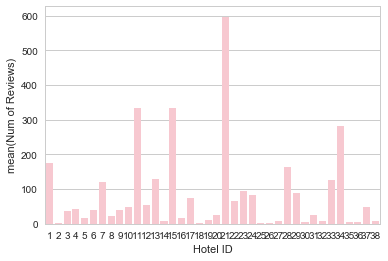

In [386]:
sns.barplot(x="Hotel ID", y='Num of Reviews',  data=percentile_list, color="pink")

Hotel with high mean grand truth have more reviews... 

# b

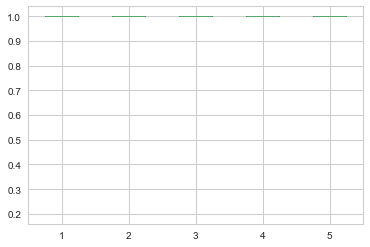

In [387]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
percentile_list['mean ground truth']=percentile_list['mean ground truth']/5
tp5gthotel = percentile_list.sort_values('mean ground truth',ascending=0).head(5)


hotelDf["ratingScore"]=hotelDf.ratingScore.astype(float)

hampton = hotelDf.loc[hotelDf['hotelName'] == tp5gthotel['HotelNames'].as_matrix()[0]]['ratingScore']/5
towneplace = hotelDf.loc[hotelDf['hotelName'] == tp5gthotel['HotelNames'].as_matrix()[1]]['ratingScore']/5
hiltonGarden = hotelDf.loc[hotelDf['hotelName'] == tp5gthotel['HotelNames'].as_matrix()[2]]['ratingScore']/5
homewood = hotelDf.loc[hotelDf['hotelName'] == tp5gthotel['HotelNames'].as_matrix()[3]]['ratingScore']/5
courtyard = hotelDf.loc[hotelDf['hotelName'] == tp5gthotel['HotelNames'].as_matrix()[4]]['ratingScore']/5

dataa = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(dataa, showbox =True, showcaps =True)
plt.show()
#print(dataa)
#print(percentile_list['mean ground truth'])

In [388]:
tp5gthotel

,Hotel ID,HotelNames,Num of Reviews,mean ground truth,mean vader
24,25,Powders Edge,1,0.200000,0.985100
29,30,Sunpath at Stoney Creek,5,0.200000,0.950940
20,21,Nita Lake Lodge,597,0.193635,0.934444
12,13,Four Seasons Resort and Residences Whistler,130,0.192000,0.911043
11,12,First Tracks Lodge,53,0.190189,0.865998


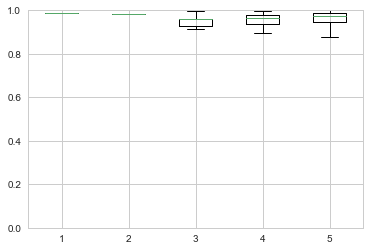

In [389]:
#Plot top 5 side-by-side boxplot for top 5 vader rated hotel
tp5vdhotel = percentile_list.sort_values('mean vader',ascending=0).head(5)
tp5vdhotel_array=tp5vdhotel['HotelNames'].as_matrix()

Legends = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[0]] ['vader']
HiltonWhistlerResortSpa = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[1]] ['vader']
WhistlerLuxuryCondos = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[2]] ['vader']
PinnacleHotelWhistler= hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[3]] ['vader']
FirstTracksLodge = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[4]] ['vader']

data = [Legends, HiltonWhistlerResortSpa,WhistlerLuxuryCondos,PinnacleHotelWhistler, FirstTracksLodge]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.ylim([0,1])
plt.show()
#print (data)

In [390]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = percentile_list.sort_values('mean ground truth',ascending=0).head(5)
tp5gthotel_array=tp5gthotel['HotelNames'].as_matrix()

aLegends = hotelDf.loc[hotelDf['hotelName'] ==tp5gthotel_array[0]] ['ratingScore'].mean()
aFirstTracksLodge = hotelDf.loc[hotelDf['hotelName'] ==tp5gthotel_array[1]] ['ratingScore'].mean()
aLostLakeLodge = hotelDf.loc[hotelDf['hotelName'] ==tp5gthotel_array[2]] ['ratingScore'].mean()
aExecutiveInnAtWhistlerVillage= hotelDf.loc[hotelDf['hotelName'] ==tp5gthotel_array[3]] ['ratingScore'].mean()
aCrystalLodgeHotel = hotelDf.loc[hotelDf['hotelName'] ==tp5gthotel_array[4]] ['ratingScore'].mean()

bLegends = hotelDf.loc[hotelDf['hotelName'] ==tp5gthotel_array[0]] ['ratingScore'].std()
bFirstTracksLodge = hotelDf.loc[hotelDf['hotelName'] ==tp5gthotel_array[1]] ['ratingScore'].std()
bLostLakeLodge = hotelDf.loc[hotelDf['hotelName'] ==tp5gthotel_array[2]] ['ratingScore'].std()
bExecutiveInnAtWhistlerVillage= hotelDf.loc[hotelDf['hotelName'] ==tp5gthotel_array[3]] ['ratingScore'].std()
bCrystalLodgeHotel = hotelDf.loc[hotelDf['hotelName'] ==tp5gthotel_array[4]] ['ratingScore'].std()

In [391]:
gtmean=np.array([aLegends,aFirstTracksLodge,aLostLakeLodge,aExecutiveInnAtWhistlerVillage,aCrystalLodgeHotel])
gtstd=np.array([bLegends,bFirstTracksLodge,bLostLakeLodge,bExecutiveInnAtWhistlerVillage,bCrystalLodgeHotel])
gt=tp5gthotel_array
gtdict={}
gtdict["mean"]=gtmean
gtdict["std"]=gtstd
gtdict["hotel name"]=gt


pandas.DataFrame( gtdict )

,hotel name,mean,std
0,Powders Edge,5.000000,NaN
1,Sunpath at Stoney Creek,5.000000,0.000000
2,Nita Lake Lodge,4.840871,0.396890
3,Four Seasons Resort and Residences Whistler,4.800000,0.534108
4,First Tracks Lodge,4.754717,0.434372


In [392]:
#Plot top 5 side-by-side boxplot for top 5 vader rated hotel
tp5vdhotel = percentile_list.sort_values('mean vader',ascending=0).head(5)
tp5vdhotel_array=tp5vdhotel['HotelNames'].as_matrix()

vdLegends = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[0]] ['vader'].mean()
vdHiltonWhistlerResortSpa = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[1]] ['vader'].mean()
vdWhistlerLuxuryCondos = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[2]] ['vader'].mean()
vdPinnacleHotelWhistler= hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[3]] ['vader'].mean()
vdFirstTracksLodge = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[4]] ['vader'].mean()

stdLegends = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[0]] ['vader'].std()
stdHiltonWhistlerResortSpa = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[1]] ['vader'].std()
stdWhistlerLuxuryCondos = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[2]] ['vader'].std()
stdPinnacleHotelWhistler= hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[3]] ['vader'].std()
stdFirstTracksLodge = hotelDf.loc[hotelDf['hotelName'] ==tp5vdhotel_array[4]] ['vader'].std()


vdmean=np.array([vdLegends, vdHiltonWhistlerResortSpa,vdWhistlerLuxuryCondos,vdPinnacleHotelWhistler, vdFirstTracksLodge])
vdstd=np.array([stdLegends, stdHiltonWhistlerResortSpa,stdWhistlerLuxuryCondos,stdPinnacleHotelWhistler, stdFirstTracksLodge])
vd=tp5gthotel_array
vddict={}
vddict["mean"]=vdmean
vddict["std"]=vdstd
vddict["hotel name"]=vd


pandas.DataFrame( vddict )

,hotel name,mean,std
0,Powders Edge,0.988600,NaN
1,Sunpath at Stoney Creek,0.985100,NaN
2,Nita Lake Lodge,0.950940,0.031999
3,Four Seasons Resort and Residences Whistler,0.937752,0.075844
4,First Tracks Lodge,0.934444,0.171527


Box plots are better since they show median and outliers. Data visualization is a better and easier way to analyze the results than just looking at two numbers of mean and std

# C

In [393]:
hotelDf.head()

,index,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,0,117803689,data\ca\154948\1146548\118268031.html,Evolution,This is the second time this summer we stayed ...,4.0,1,0.8263
1,1,118268031,data\ca\154948\1146548\119564117.html,Evolution,"I really like this hotel, the decor is very mo...",5.0,1,0.9883
2,2,119564117,data\ca\154948\1146548\121167484.html,Evolution,We went to Whistler for the first time at the ...,5.0,1,0.8550
3,3,125313857,data\ca\154948\1146548\125351897.html,Evolution,Just returned from 8 days at Evolution. The pr...,5.0,1,0.9928
4,4,125011399,data\ca\154948\1146548\125351897.html,Evolution,"We visited Whistler with our three children, a...",5.0,1,0.8459


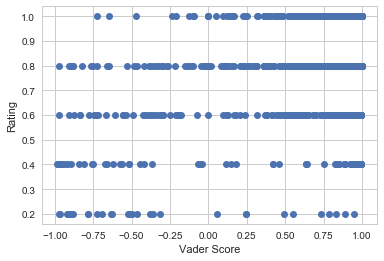

In [394]:
y=hotelDf["ratingScore"]/5
y=y.as_matrix()
x=hotelDf["vader"].as_matrix()
plt.plot(x, y, "o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

As rating increases, vader scores also should increase. we can see on the left below side and upper right side the scatterplot is more dense which shows that higher rates have high vader score and low rates have low vader
also the middle part of the graph should be dense.

The diagnol should be more dense

In [395]:
hotelDf["ratingScore"].isnull().sum()

0

In [396]:
hotelDf["vader"].isnull().sum()
#len(hotelDf["vader"])

0

In [397]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

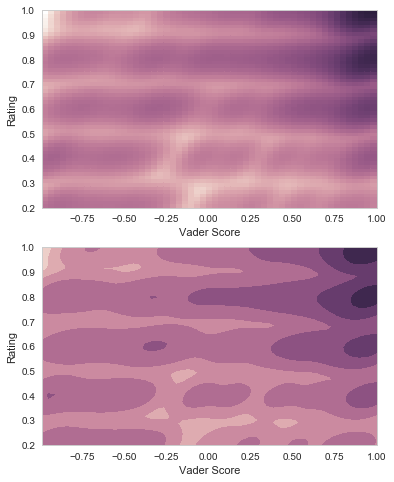

In [398]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

shows that vader performs better for higher score. 

b

In [399]:
if 'ReviewLen' not in hotelDf.columns:
    ReviewLen_list=[]
    for cell in hotelDf["reviewColumn"]:
        ReviewLen_list.append(len(cell.split()))
    aaaa= pandas.DataFrame(ReviewLen_list)
    RLen_dict={}
    RLen_dict["Length of Review"]=ReviewLen_list
    hotelDf=hotelDf.join(pandas.DataFrame.from_dict(RLen_dict))
else:
    print( "vader already exists")


In [400]:
hotelDf.head()

,index,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader,Length of Review
0,0,117803689,data\ca\154948\1146548\118268031.html,Evolution,This is the second time this summer we stayed ...,4.0,1,0.8263,207
1,1,118268031,data\ca\154948\1146548\119564117.html,Evolution,"I really like this hotel, the decor is very mo...",5.0,1,0.9883,176
2,2,119564117,data\ca\154948\1146548\121167484.html,Evolution,We went to Whistler for the first time at the ...,5.0,1,0.8550,117
3,3,125313857,data\ca\154948\1146548\125351897.html,Evolution,Just returned from 8 days at Evolution. The pr...,5.0,1,0.9928,281
4,4,125011399,data\ca\154948\1146548\125351897.html,Evolution,"We visited Whistler with our three children, a...",5.0,1,0.8459,205


In [401]:
xx= hotelDf["Length of Review"]
yy= hotelDf["ratingScore"]
zz= hotelDf["vader"]

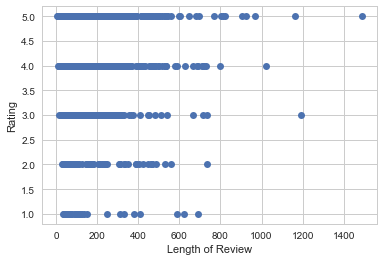

In [402]:
plt.plot(xx, yy, "o")
plt.ylabel('Rating')
plt.xlabel('Length of Review')

There is no correlation between length of reviews and ratings and vader score

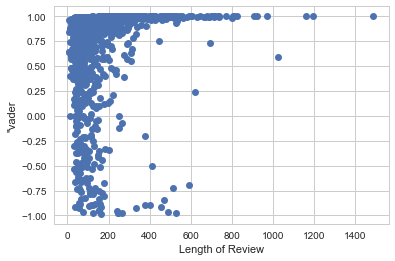

In [403]:
plt.plot(xx, zz, "o")
plt.ylabel('"vader')
plt.xlabel('Length of Review')

In [404]:
x= hotelDf["Length of Review"]
y= hotelDf["ratingScore"]

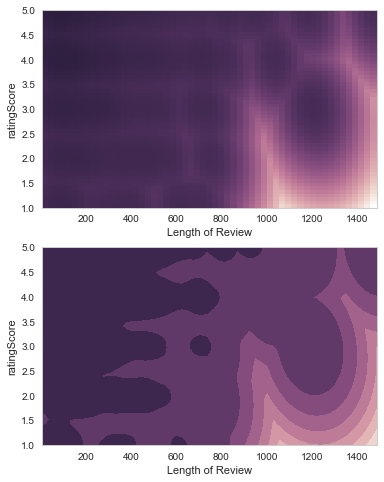

In [405]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))




cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel("Length of Review")
ax1.set_ylabel("ratingScore")

ax2.set_xlabel("Length of Review")
ax2.set_ylabel("ratingScore")

In [406]:
x= hotelDf["Length of Review"]
y= hotelDf["vader"]

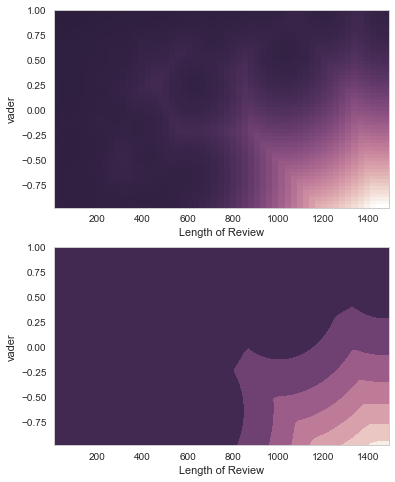

In [407]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))




cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel("Length of Review")
ax1.set_ylabel('vader')

ax2.set_xlabel("Length of Review")
ax2.set_ylabel('vader')

c

In [408]:
percentile_list.head()

,Hotel ID,HotelNames,Num of Reviews,mean ground truth,mean vader
0,1,Aava Whistler Hotel,174,0.166667,0.853725
1,2,Adara Hotel,1,0.080000,0.988600
2,3,Aspens on Blackcomb,37,0.142703,0.691005
3,4,Blackcomb Lodge,44,0.145455,0.590752
4,5,Carleton Lodge,18,0.175556,0.857072


In [409]:
x=percentile_list["Num of Reviews"]
y=percentile_list["mean ground truth"]
z=percentile_list["mean vader"]

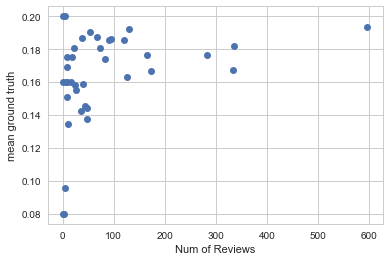

In [410]:
plt.plot(x, y, "o")
plt.ylabel("mean ground truth")
plt.xlabel("Num of Reviews")

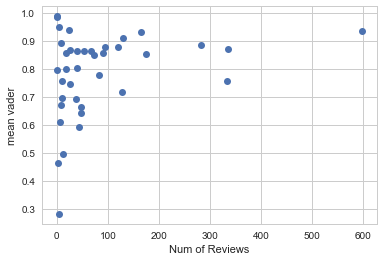

In [411]:
plt.plot(x, z, "o")
plt.ylabel("mean vader")
plt.xlabel("Num of Reviews")

In both graphs we can see that as numbers of reviews increase, mean vader and ground truth score increase as well.

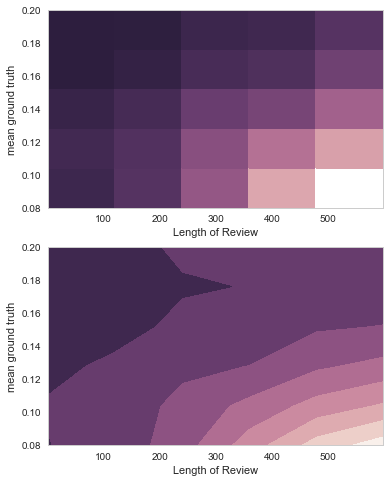

In [412]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))




cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel("Length of Review")
ax1.set_ylabel('mean ground truth')

ax2.set_xlabel("Length of Review")
ax2.set_ylabel('mean ground truth')

In [413]:
x=percentile_list["Num of Reviews"]
y=percentile_list["mean vader"]

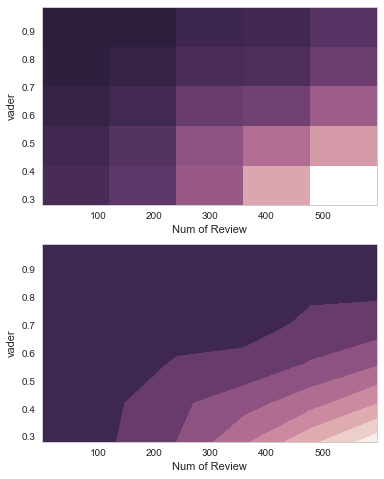

In [414]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))




cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel("Num of Review")
ax1.set_ylabel('vader')

ax2.set_xlabel("Num of Review")
ax2.set_ylabel('vader')